# Exploratory analysis
Getting to grips with the data and potential valuable features.

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
training = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
training.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [3]:
# Potentially interesting aspects at first glance:
# host and guest popularity could interact.
# Transform each into 0-1 and add a factor

# the criterium variable: listening time surely depends on the total length. A potentially useful approach is to 
# predict not the listening time, but the percentage listened! And then transform that based on new data's episode length to make final predictions.

pd.options.display.float_format = '{:.2f}'.format

In [4]:
training.describe(include = "all")

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
count,750000.00,750000,750000,662907.00,750000,750000.00,750000,750000,603970.00,749999.00,750000,750000.00
unique,NaN,48,100,NaN,10,NaN,7,4,NaN,NaN,3,NaN
top,NaN,Tech Talks,Episode 71,NaN,Sports,NaN,Sunday,Night,NaN,NaN,Neutral,NaN
freq,NaN,22847,10515,NaN,87606,NaN,115946,196849,NaN,NaN,251291,NaN
mean,374999.50,NaN,NaN,64.50,NaN,59.86,NaN,NaN,52.24,1.35,NaN,45.44
std,216506.50,NaN,NaN,32.97,NaN,22.87,NaN,NaN,28.45,1.15,NaN,27.14
min,0.00,NaN,NaN,0.00,NaN,1.30,NaN,NaN,0.00,0.00,NaN,0.00
25%,187499.75,NaN,NaN,35.73,NaN,39.41,NaN,NaN,28.38,0.00,NaN,23.18
50%,374999.50,NaN,NaN,63.84,NaN,60.05,NaN,NaN,53.58,1.00,NaN,43.38
75%,562499.25,NaN,NaN,94.07,NaN,79.53,NaN,NaN,76.60,2.00,NaN,64.81


In [5]:
test.describe(include = "all")

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
count,250000.00,250000,250000,221264.00,250000,250000.00,250000,250000,201168.00,250000.00,250000
unique,NaN,48,100,NaN,10,NaN,7,4,NaN,NaN,3
top,NaN,Tech Talks,Episode 71,NaN,Sports,NaN,Sunday,Night,NaN,NaN,Neutral
freq,NaN,7553,3492,NaN,28903,NaN,38906,65440,NaN,NaN,83671
mean,874999.50,NaN,NaN,419.30,NaN,59.72,NaN,NaN,52.19,1.36,NaN
std,72168.93,NaN,NaN,166854.50,NaN,22.88,NaN,NaN,28.45,4.27,NaN
min,750000.00,NaN,NaN,2.47,NaN,2.49,NaN,NaN,0.00,0.00,NaN
25%,812499.75,NaN,NaN,35.78,NaN,39.25,NaN,NaN,28.32,0.00,NaN
50%,874999.50,NaN,NaN,63.97,NaN,59.90,NaN,NaN,53.36,1.00,NaN
75%,937499.25,NaN,NaN,94.15,NaN,79.39,NaN,NaN,76.56,2.00,NaN


In [6]:
# all variables have an OK-ish rate of completeness, none with lots of NA's.
# Let's impute the NA's

# median for numeric, mode for categorical

from sklearn.impute import SimpleImputer

numeric_cols = training.select_dtypes(include="number").columns
categorical_cols = training.select_dtypes(include="object").columns


In [7]:
training.loc[:, numeric_cols[2]]

0        74.81
1        66.95
2        69.97
3        57.22
4        80.07
          ... 
749995   69.36
749996   35.21
749997   78.58
749998   45.39
749999   22.45
Name: Host_Popularity_percentage, Length: 750000, dtype: float64

In [8]:
training[numeric_cols[2]]

0        74.81
1        66.95
2        69.97
3        57.22
4        80.07
          ... 
749995   69.36
749996   35.21
749997   78.58
749998   45.39
749999   22.45
Name: Host_Popularity_percentage, Length: 750000, dtype: float64

In [9]:
imputer = SimpleImputer(strategy = "mean").\
    fit(training[numeric_cols[2]].to_frame()).\
    transform(training[numeric_cols[2]].to_frame())
imputer

array([[74.81],
       [66.95],
       [69.97],
       ...,
       [78.58],
       [45.39],
       [22.45]], shape=(750000, 1))

In [10]:
# Numerics imputation
num_imputers = []

for ix, num_col in enumerate(numeric_cols):
    num_imputers.append(SimpleImputer(strategy = "mean"))
    num_imputers[ix].fit(training[numeric_cols[ix]].to_frame())
    new_values = num_imputers[ix].transform(training[numeric_cols[ix]].to_frame())
    training.loc[:, numeric_cols[ix]] = new_values

training.head()    

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,64.50,True Crime,74.81,Thursday,Night,52.24,0.00,Positive,31.42
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.00,Negative,88.01
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.00,Negative,44.93
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.00,Positive,46.28
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.00,Neutral,75.61


In [11]:
# Categoricals imputation

cat_imputers = []

for ix, num_col in enumerate(categorical_cols):
    cat_imputers.append(SimpleImputer(strategy = "most_frequent"))
    cat_imputers[ix].fit(training[categorical_cols[ix]].to_frame())
    new_values = cat_imputers[ix].transform(training[categorical_cols[ix]].to_frame())
    training.loc[:, categorical_cols[ix]] = new_values

training.head()  

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,64.50,True Crime,74.81,Thursday,Night,52.24,0.00,Positive,31.42
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.00,Negative,88.01
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.00,Negative,44.93
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.00,Positive,46.28
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.00,Neutral,75.61


In [12]:


# Lets see the titles, how many are in the format Episode X and whether that could be a useful feature.
starts_episode = [bool(re.search("^episode", title.lower())) for title in training.Episode_Title]

pd.Series(starts_episode).value_counts()
# ALL of them! super useful!

True    750000
Name: count, dtype: int64

In [13]:
# Extract the numeric part of Episode X

episodes_no = [int(re.findall(r"\d+", title)[0]) for title in training.Episode_Title]

training["episode_no"] = episodes_no
training.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,episode_no
0,0,Mystery Matters,Episode 98,64.50,True Crime,74.81,Thursday,Night,52.24,0.00,Positive,31.42,98
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.00,Negative,88.01,26
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.00,Negative,44.93,16
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.00,Positive,46.28,45
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.00,Neutral,75.61,86


In [14]:
# Host x Guest popularity factor
training["Host_Popularity_percentage"] = training["Host_Popularity_percentage"]/100
training["Guest_Popularity_percentage"] = training["Guest_Popularity_percentage"]/100

training["Host_Guest_combo_percentage"] = training["Host_Popularity_percentage"] * training["Guest_Popularity_percentage"]

# Even a different metric, like harmonic mean, that leans towards the lower rating could be fun

training.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,episode_no,Host_Guest_combo_percentage
0,0,Mystery Matters,Episode 98,64.50,True Crime,0.75,Thursday,Night,0.52,0.00,Positive,31.42,98,0.39
1,1,Joke Junction,Episode 26,119.80,Comedy,0.67,Saturday,Afternoon,0.76,2.00,Negative,88.01,26,0.51
2,2,Study Sessions,Episode 16,73.90,Education,0.70,Tuesday,Evening,0.09,0.00,Negative,44.93,16,0.06
3,3,Digital Digest,Episode 45,67.17,Technology,0.57,Monday,Morning,0.79,2.00,Positive,46.28,45,0.45
4,4,Mind & Body,Episode 86,110.51,Health,0.80,Monday,Afternoon,0.59,3.00,Neutral,75.61,86,0.47


In [15]:
# weirdness in data - some rows have more listened time than episode length
training.loc[training.Listening_Time_minutes > training.Episode_Length_minutes]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,episode_no,Host_Guest_combo_percentage
54,54,Innovators,Episode 21,64.50,Technology,0.75,Tuesday,Afternoon,0.46,0.00,Neutral,71.17,21,0.34
113,113,Current Affairs,Episode 44,17.94,News,0.97,Saturday,Morning,0.13,1.00,Neutral,17.94,44,0.13
221,221,Innovators,Episode 79,64.50,Technology,0.91,Saturday,Evening,0.40,0.00,Negative,119.73,79,0.36
242,242,Fitness First,Episode 68,64.50,Health,0.30,Saturday,Evening,0.13,1.00,Neutral,94.71,68,0.04
251,251,Tune Time,Episode 34,64.50,Music,0.49,Tuesday,Afternoon,0.31,0.00,Positive,95.62,34,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749847,749847,Tune Time,Episode 25,64.50,Music,0.90,Sunday,Evening,0.68,0.00,Negative,67.23,25,0.61
749856,749856,Home & Living,Episode 16,64.50,Lifestyle,0.37,Sunday,Night,0.52,0.00,Positive,89.35,16,0.19
749868,749868,Mystery Matters,Episode 80,64.50,True Crime,0.33,Thursday,Night,0.27,0.00,Positive,89.96,80,0.09
749943,749943,World Watch,Episode 42,64.50,News,0.80,Saturday,Afternoon,0.15,1.00,Neutral,80.43,42,0.12


In [16]:
# Not a small number. We could fix those values to be equal to the max length.
# for the beginning, leave as is. We could explore if this improves predictability - is having a longer listening% feasible?


# Also, there's one row with 0 episode length. We'll set that to 0.01 first.

training.loc[training.Episode_Length_minutes == 0, "Episode_Length_minutes"]  = 0.01



In [17]:
training.loc[training.Episode_Length_minutes == 0]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,episode_no,Host_Guest_combo_percentage


In [18]:
# Listened percentage of total length

training["Listened_percent"] = training["Listening_Time_minutes"] / training["Episode_Length_minutes"]
training.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,episode_no,Host_Guest_combo_percentage,Listened_percent
0,0,Mystery Matters,Episode 98,64.50,True Crime,0.75,Thursday,Night,0.52,0.00,Positive,31.42,98,0.39,0.49
1,1,Joke Junction,Episode 26,119.80,Comedy,0.67,Saturday,Afternoon,0.76,2.00,Negative,88.01,26,0.51,0.73
2,2,Study Sessions,Episode 16,73.90,Education,0.70,Tuesday,Evening,0.09,0.00,Negative,44.93,16,0.06,0.61
3,3,Digital Digest,Episode 45,67.17,Technology,0.57,Monday,Morning,0.79,2.00,Positive,46.28,45,0.45,0.69
4,4,Mind & Body,Episode 86,110.51,Health,0.80,Monday,Afternoon,0.59,3.00,Neutral,75.61,86,0.47,0.68


In [19]:
# Check out which categorical variables have most impact on listening
# - this is where the listened percentages are more indicative

training.groupby(["Genre"], dropna = True)[["Listened_percent", "Listening_Time_minutes"]].mean()

# The genre doesn't seem to have a big impact

,Listened_percent,Listening_Time_minutes
Genre,,
Business,0.68,45.54
Comedy,0.68,44.43
Education,0.68,45.74
Health,0.68,45.74
Lifestyle,0.69,45.52
Music,0.68,46.58
News,0.67,44.41
Sports,0.67,44.94
Technology,0.69,45.63


In [20]:
# Count how many episodes of each podcast we have
# if there's a low number of ep, any aggregate statistics will be skewed
training.groupby(["Podcast_Name"], dropna = True)[["Listening_Time_minutes"]].count().sort_values(by = "Listening_Time_minutes", ascending = False)


# Having such a large number of rows for each makes me rethink the structure of the data - rows aren't individual episodes, but listeners?


,Listening_Time_minutes
Podcast_Name,
Tech Talks,22847
Sports Weekly,20053
Funny Folks,19635
Tech Trends,19549
Fitness First,19488
Business Insights,19480
Style Guide,19364
Game Day,19272
Melody Mix,18889


In [21]:
training.loc[training.Podcast_Name == "News Roundup"].sort_values("Episode_Title")

# So "the same show" has LOTS of episodes named the same, with varying length, publication time etc.
# I think this is an artifact of synthetic data generation. So we SHOULD treat each row as its own episode and not worry about
# how this would realistically occur.

# This also means that "duplicated" rows (where everything except ID is the same) should NOT be excluded. They represent two episodes with same features,
# which should give more weight to parameters that correctly predict their listening time.

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,episode_no,Host_Guest_combo_percentage,Listened_percent
628471,628471,News Roundup,Episode 1,94.30,News,0.96,Tuesday,Night,0.52,1.00,Negative,82.82,1,0.50,0.88
243638,243638,News Roundup,Episode 1,64.50,News,0.41,Tuesday,Evening,0.29,0.00,Positive,77.33,1,0.12,1.20
7125,7125,News Roundup,Episode 1,52.34,News,0.78,Friday,Morning,0.43,0.00,Positive,34.44,1,0.34,0.66
237646,237646,News Roundup,Episode 1,64.50,News,0.37,Wednesday,Night,0.31,2.00,Negative,58.14,1,0.12,0.90
640272,640272,News Roundup,Episode 1,89.16,News,0.71,Tuesday,Night,0.76,2.00,Positive,56.93,1,0.54,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321116,321116,News Roundup,Episode 99,92.29,News,0.30,Saturday,Night,0.28,1.00,Positive,83.34,99,0.08,0.90
678303,678303,News Roundup,Episode 99,14.63,News,0.99,Monday,Night,0.80,1.00,Negative,3.70,99,0.79,0.25
271159,271159,News Roundup,Episode 99,28.26,News,0.52,Thursday,Afternoon,0.83,3.00,Negative,13.34,99,0.43,0.47
296283,296283,News Roundup,Episode 99,72.17,News,0.56,Thursday,Evening,0.56,0.00,Neutral,64.93,99,0.31,0.90


In [22]:
# Individual podcasts
training.groupby(["Podcast_Name"], dropna = True)[["Listened_percent", "Listening_Time_minutes"]].mean().sort_values("Listened_percent", ascending = False)


# Catching the "top-performers" in a yes/no variable could be useful, accounting for
# some third factor not explained by other variables.

# the percentage is more useful here since some podcasts have shorter episodes on average


,Listened_percent,Listening_Time_minutes
Podcast_Name,,
Fashion Forward,0.73,45.46
Tech Talks,0.70,46.16
Crime Chronicles,0.69,47.68
Money Matters,0.69,47.88
True Crime Stories,0.69,46.26
Gadget Geek,0.69,47.03
Detective Diaries,0.69,46.76
Mystery Matters,0.69,46.02
Tune Time,0.69,46.90


In [23]:

best_performers = training.groupby(["Podcast_Name"], dropna = True)[["Listened_percent"]].mean().sort_values("Listened_percent", ascending = False)

best_performers = best_performers.loc[best_performers.Listened_percent >= 0.7].index.to_list()

training["best_performer_podcast"] = [podcast in best_performers for podcast in training.Podcast_Name]

training.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,episode_no,Host_Guest_combo_percentage,Listened_percent,best_performer_podcast
0,0,Mystery Matters,Episode 98,64.50,True Crime,0.75,Thursday,Night,0.52,0.00,Positive,31.42,98,0.39,0.49,False
1,1,Joke Junction,Episode 26,119.80,Comedy,0.67,Saturday,Afternoon,0.76,2.00,Negative,88.01,26,0.51,0.73,False
2,2,Study Sessions,Episode 16,73.90,Education,0.70,Tuesday,Evening,0.09,0.00,Negative,44.93,16,0.06,0.61,False
3,3,Digital Digest,Episode 45,67.17,Technology,0.57,Monday,Morning,0.79,2.00,Positive,46.28,45,0.45,0.69,False
4,4,Mind & Body,Episode 86,110.51,Health,0.80,Monday,Afternoon,0.59,3.00,Neutral,75.61,86,0.47,0.68,False


# Plotting features and target

In [24]:
import matplotlib.pyplot as plt

In [25]:
# TODO - limit outliers on listened percent

Text(0, 0.5, 'proportion listened')

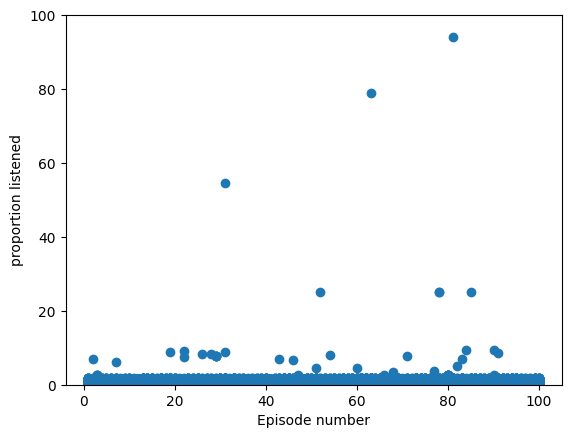

In [26]:
plt.scatter(training.episode_no,
        training.Listened_percent)
plt.ylim(0, 100)
plt.xlabel("Episode number")
plt.ylabel("proportion listened")

In [27]:
#plt_data = training.loc[training.Listened_percent < 200]

#plt.scatter(plt_data.episode_no,
#        plt_data.Listened_percent)

Text(0, 0.5, 'proportion listened')

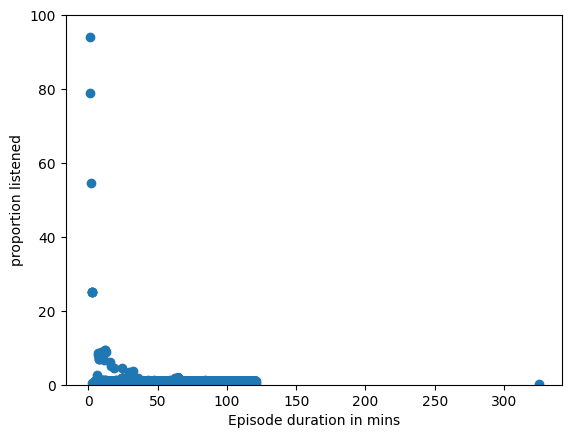

In [28]:
plt.scatter(training.Episode_Length_minutes,
        training.Listened_percent)
plt.ylim(0, 100)
plt.xlabel("Episode duration in mins")
plt.ylabel("proportion listened")

Text(0, 0.5, 'proportion listened')

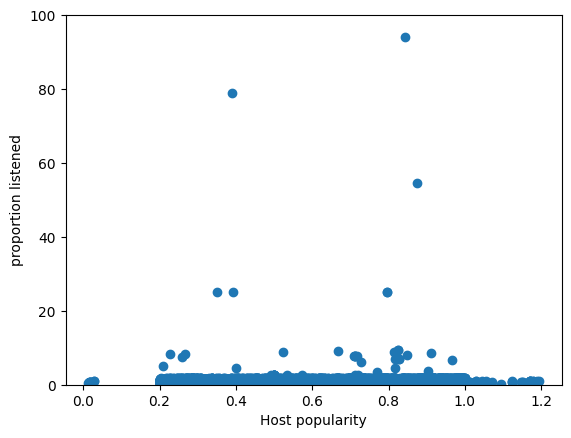

In [29]:
plt.scatter(training.Host_Popularity_percentage,
        training.Listened_percent)
plt.ylim(0, 100)
plt.xlabel("Host popularity")
plt.ylabel("proportion listened")

## Alternatives  
With such a large number of points, outliers dominate any scatterplot, making the main body an indistinguishable rectangle.  
We'll try hexplots and heatmaps to better determine potential relationships in the data.  


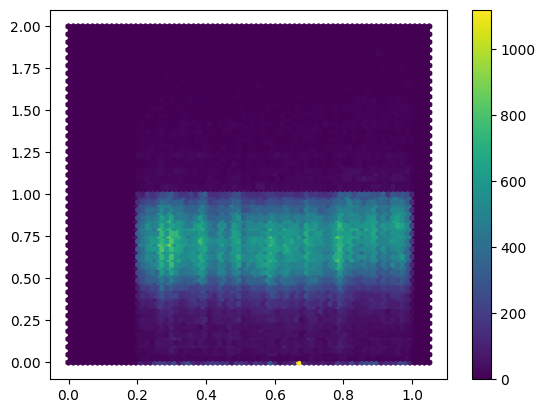

In [30]:
fig, ax = plt.subplots()

hex = plt.hexbin(training.Host_Popularity_percentage,
        training.Listened_percent,
           # Minimal number of points to display
          #mincnt = 1000,
           gridsize = 75,
          extent = (0, 1.05, 0, 2 ))

fig.colorbar(hex, ax = ax)

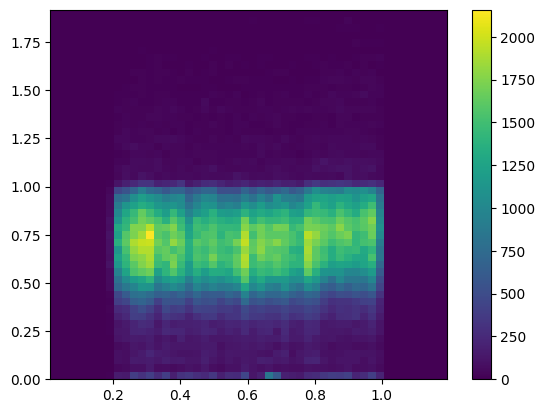

In [31]:
hist_data = training.loc[training.Listened_percent <= 2]

# subplots - separate display of the colorbar
fig, ax = plt.subplots()
h = plt.hist2d(hist_data.Host_Popularity_percentage,
        hist_data.Listened_percent,
          bins = [50, 50])
fig.colorbar(h[3], ax = ax)

# h[3] is a matplotlib.collections.QuadMesh which has methods like get_clim() 
#to get the colorbar limits, pallete, normalization
# for transforming raw x into 0-1 on bar.
# plt.clim(min_raw, max_raw) to manually set range

Text(0, 0.5, 'proportion listened')

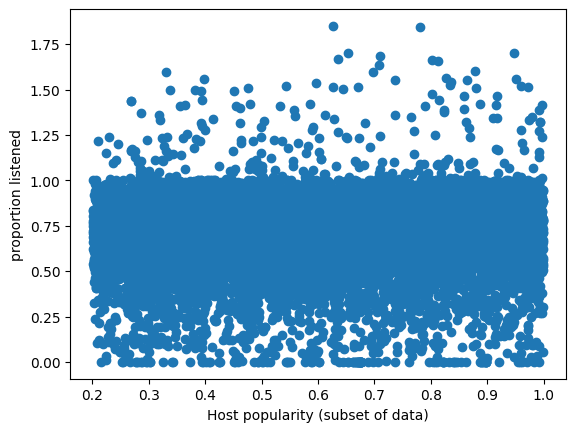

In [32]:
# Test to see if the pattern repeats on a subsample small enough to be
# discernible on a scatterplot
subs = training.sample(10000)

# still need to crop the y axis
subs = subs[subs.Listened_percent <= 2]

plt.scatter(subs.Host_Popularity_percentage,
        subs.Listened_percent)
plt.xlabel("Host popularity (subset of data)")
plt.ylabel("proportion listened")

# 10000 still a block of results

Text(0, 0.5, 'proportion listened')

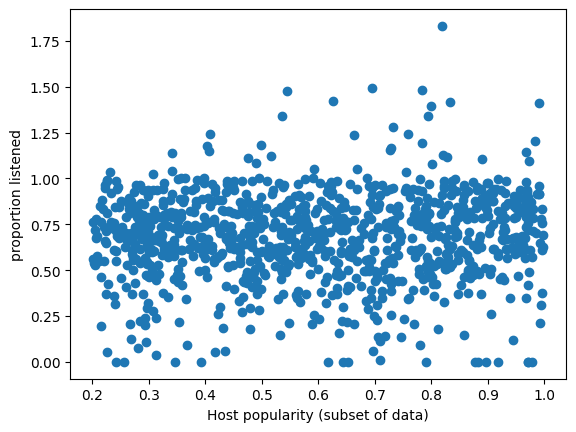

In [33]:
# Test to see if the pattern repeats on a subsample small enough to be
# discernible on a scatterplot
subs = training.sample(1000)

# still need to crop the y axis
subs = subs[subs.Listened_percent <= 2]

plt.scatter(subs.Host_Popularity_percentage,
        subs.Listened_percent)
plt.xlabel("Host popularity (subset of data)")
plt.ylabel("proportion listened")

# 1000 seems readable

Text(0, 0.5, 'proportion listened')

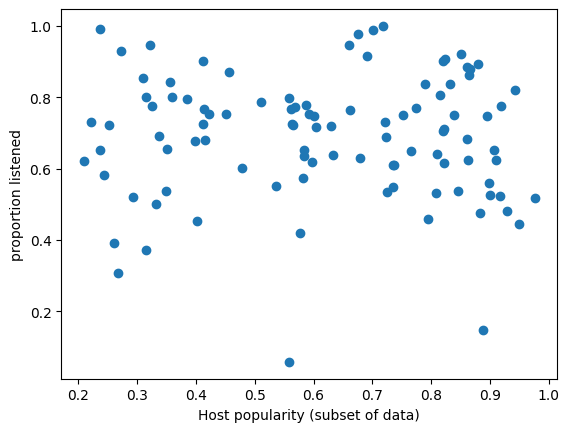

In [34]:
# Test to see if the pattern repeats on a subsample small enough to be
# discernible on a scatterplot
subs = training.sample(100)

# still need to crop the y axis
subs = subs[subs.Listened_percent <= 2]

plt.scatter(subs.Host_Popularity_percentage,
        subs.Listened_percent)
plt.xlabel("Host popularity (subset of data)")
plt.ylabel("proportion listened")

# 100 is readable but surely prone to accidental patterns

# Repeat experiment on variable more connected to targets

### Histogram of targets

Initially the range of proportion of episodes listened seems confusing, what's with the small percentage?
Actually, there's a bit of EXTREME outliers -> value of 1 is 100%. We have values of 100+, that's actually 10000%!
But there's very very few of such cases. Most should be, as expected, below 1 (<100%)

Let's explore this in more detail and make further plots only in the relevant range so that we can actually see some of the connections.

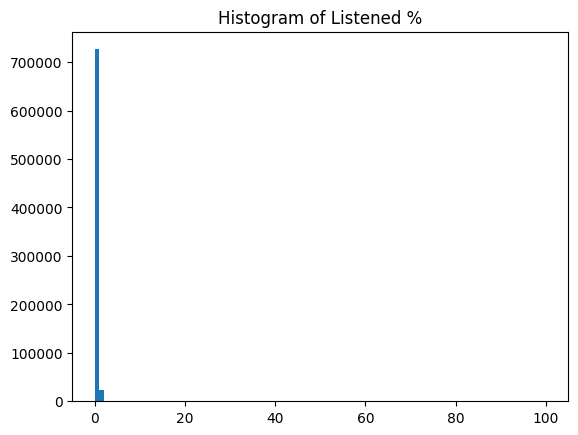

In [35]:
plt.hist(training.Listened_percent,
        range = (0, 100) # even here we have to limit the range because some outliers are > 800
        ,bins = 100
        )

_ = plt.title("Histogram of Listened %")

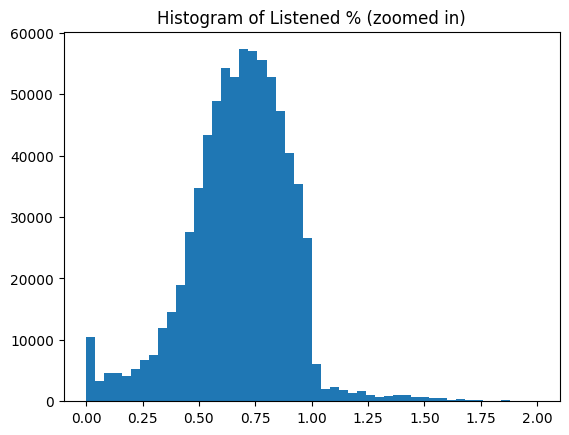

In [36]:
# zoom in even more

plt.hist(training.Listened_percent,
        range = (0, 2) # so, only looking at max 200% listening time
        ,bins = 50
        )

_ = plt.title("Histogram of Listened % (zoomed in)")

In line with expectations, a bit of negative skew. Most results ~ 70% listened, which the mean also indicates, with a spike where some episodes were listened <5% of duration.  

For detailed plotting, let's focus on the range of 0-100% (in actual values, 0-1).

# Plots zoomed in on 0-100% listened

In [37]:
zoomed = training.loc[training.Listened_percent <= 1]

In [38]:
def make_hist2d(
    xvar,
    title
):
    fig, ax = plt.subplots()
    
    h = plt.hist2d(zoomed[xvar],
            zoomed.Listened_percent,
              bins = [50, 50])
    plt.title(title)
    plt.ylabel("% listened")
    fig.colorbar(h[3], ax = ax)
    return None

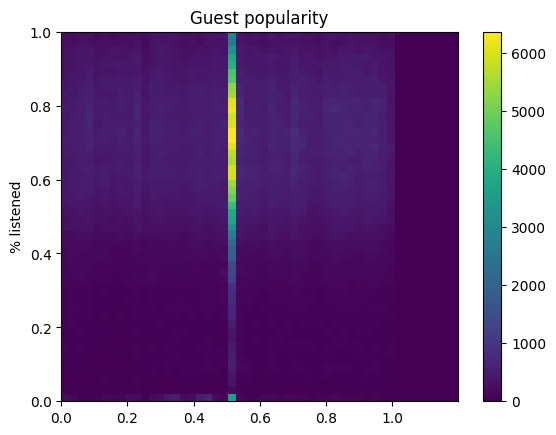

In [39]:
make_hist2d("Guest_Popularity_percentage",
           "Guest popularity")

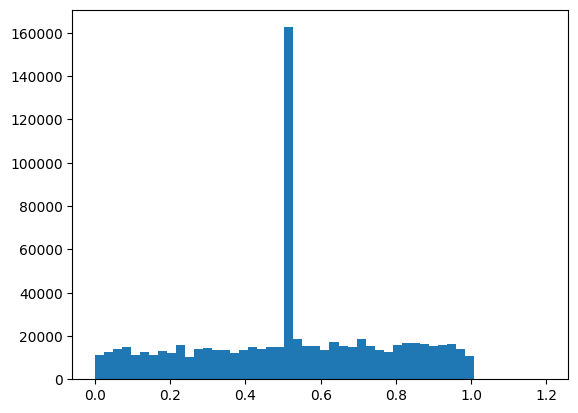

In [57]:
_ = plt.hist(training.Guest_Popularity_percentage
         ,bins = 50
        )

# Mostly everything has the same value

# But in real data could still be useful! 
# If a certain guest REALLY is specially liked or disliked, it could be reasonable
# to link only those cases to changes in listening time,
# even though this only applies to a majority of guests.

# Maybe categorising into low, medium (0.45-0.55 popularity), high.
# So differences between 0.7 - 0.9 popularity don't get exagerrated.

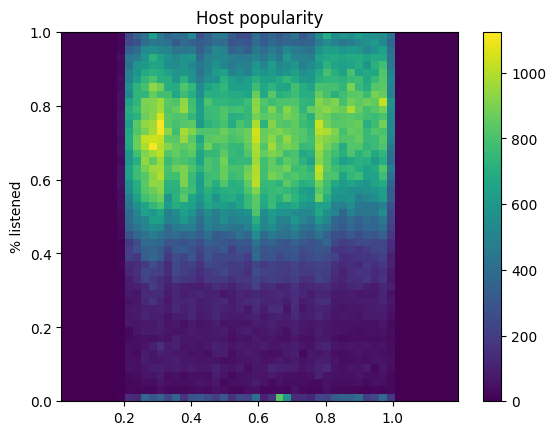

In [41]:
make_hist2d("Host_Popularity_percentage",
           "Host popularity")

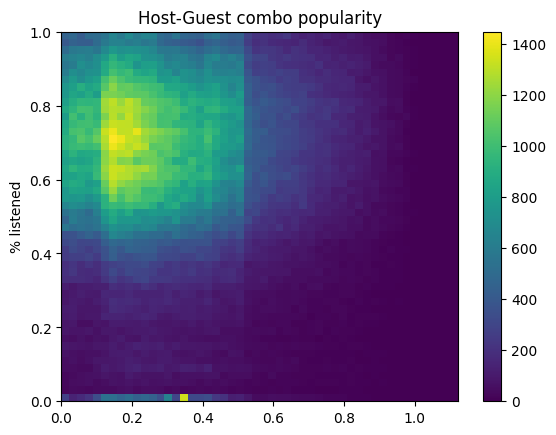

In [42]:
make_hist2d("Host_Guest_combo_percentage",
           "Host-Guest combo popularity")

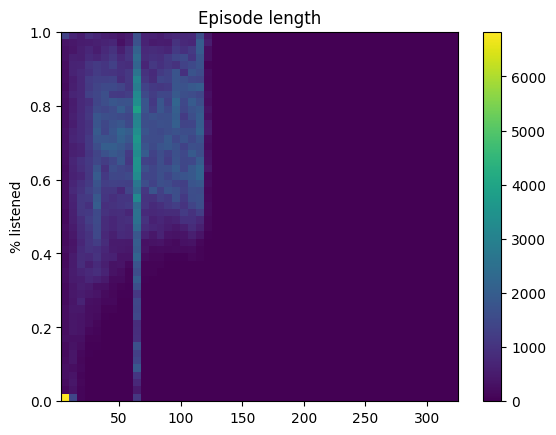

In [43]:
make_hist2d("Episode_Length_minutes",
           "Episode length")

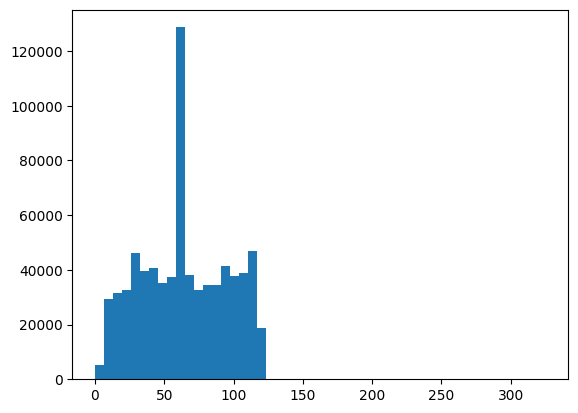

In [58]:
_ = plt.hist(training.Episode_Length_minutes
         , bins = 50
        )

# So in the plot above, it's just that the yellow bin has "squished" a lot of the x range
# in the 0% part since extreme lengths take up more than half the plot.
# and the 0% part is disproportionately populated by itself.

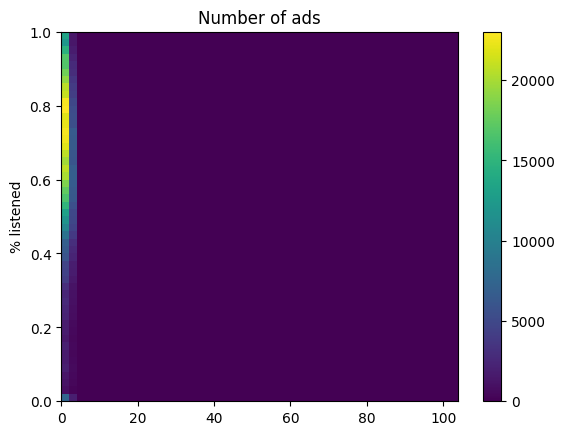

In [44]:
make_hist2d("Number_of_Ads",
           "Number of ads")

# Explored in the bar chart section

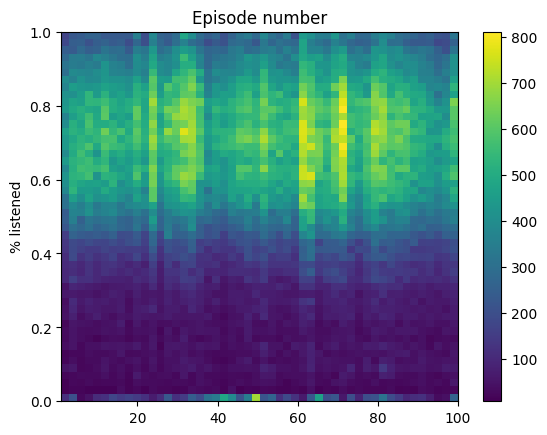

In [45]:
make_hist2d("episode_no",
           "Episode number")

No single feature has a clear positive/negative relationship with the target.  

Notes:
Since the data is artificial, maybe the percentage is NOT the more useful measure, even though it would be on real data.  
This could be good practice to get a somewhat predictive model on a model trained on lots of weakly associated data.

In [46]:
# Trend lines
import seaborn as sns

# Disabled because plotting 100,000's of data takes a while 
# sns.regplot(x = zoomed.episode_no, y = zoomed.Listened_percent, ci=False, line_kws={'color':'red'})

<Axes: xlabel='episode_no', ylabel='Listened_percent'>

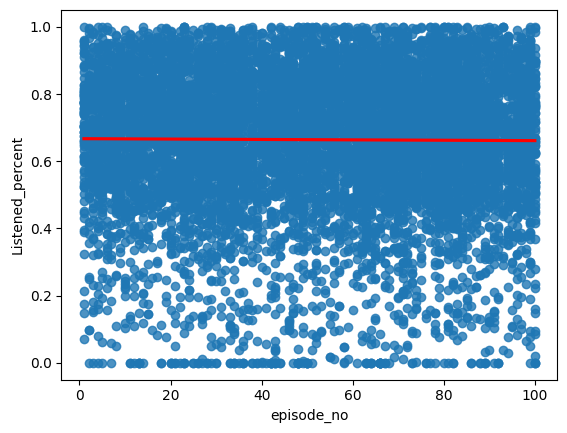

In [59]:
# same plot, subset of data
subs = training.sample(10000)

# still need to crop the y axis
subs = subs[subs.Listened_percent <= 1]

sns.regplot(x = subs.episode_no, y = subs.Listened_percent, ci=False, line_kws={'color':'red'})

<Axes: xlabel='Host_Popularity_percentage', ylabel='Listened_percent'>

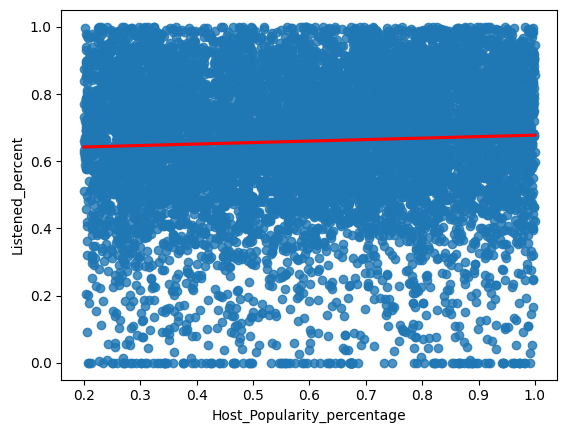

In [60]:
# same plot, subset of data
subs = training.sample(10000)

# still need to crop the y axis
subs = subs[subs.Listened_percent <= 1]

sns.regplot(x = subs.Host_Popularity_percentage, y = subs.Listened_percent, ci=False, line_kws={'color':'red'})

## Barplots of categoricals

In [49]:
categorical_cols

Index(['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day',
       'Publication_Time', 'Episode_Sentiment'],
      dtype='object')

In [50]:
zoomed.groupby("Genre")[["Listened_percent"]].mean()

,Listened_percent
Genre,
Business,0.66
Comedy,0.66
Education,0.66
Health,0.66
Lifestyle,0.66
Music,0.67
News,0.66
Sports,0.66
Technology,0.67


In [51]:
sorted(zoomed.Genre.unique())

['Business',
 'Comedy',
 'Education',
 'Health',
 'Lifestyle',
 'Music',
 'News',
 'Sports',
 'Technology',
 'True Crime']

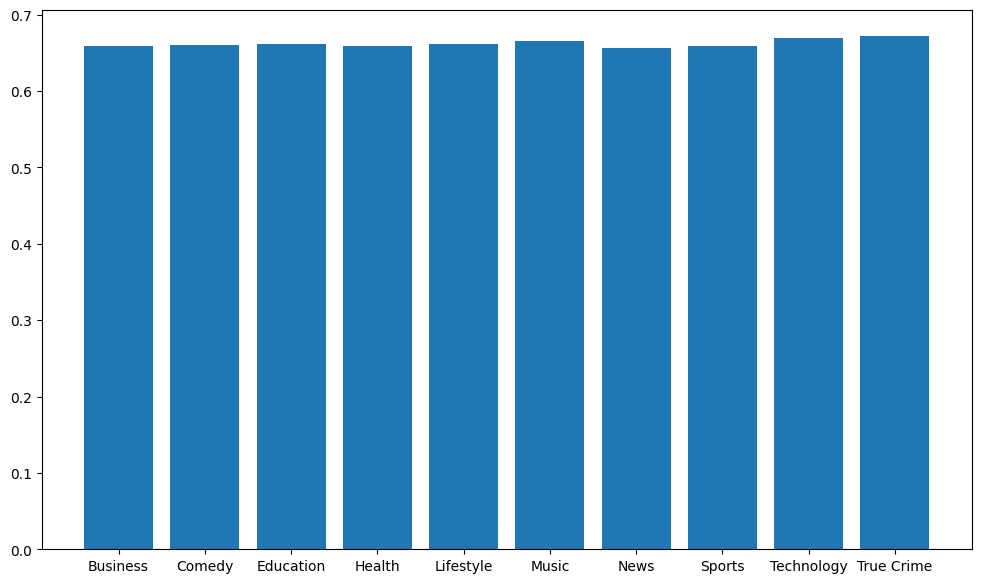

In [52]:
fig, ax = plt.subplots()

plt.bar(x = sorted(zoomed.Genre.unique()), 
       height = zoomed.groupby("Genre")[["Listened_percent"]].mean().unstack()
       )
plt.xticks(fontsize=10)

fig.set_size_inches(12,7)

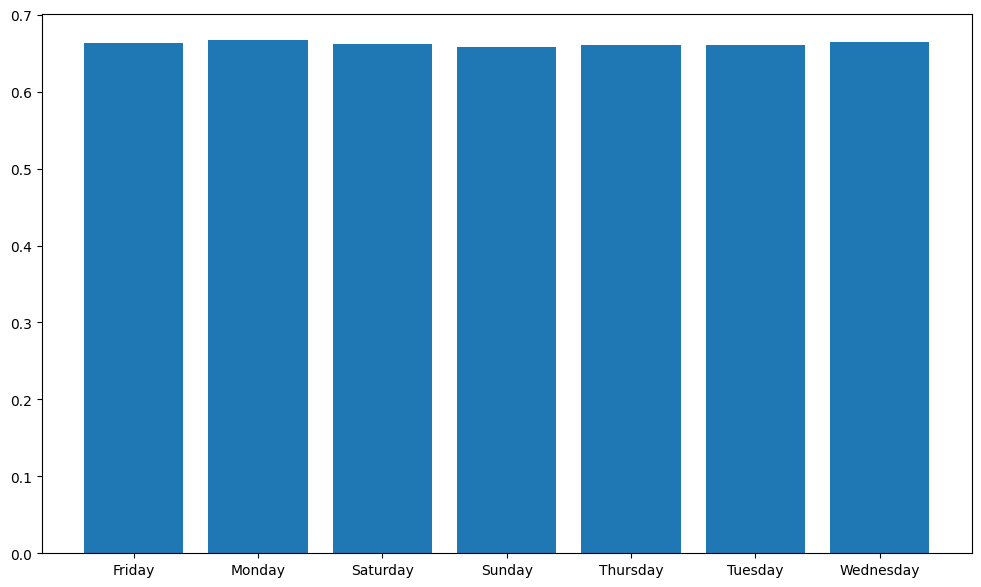

In [53]:
fig, ax = plt.subplots()

plt.bar(x = sorted(zoomed.Publication_Day.unique()), 
       height = zoomed.groupby("Publication_Day")[["Listened_percent"]].mean().unstack()
       )
plt.xticks(fontsize=10)

fig.set_size_inches(12,7)

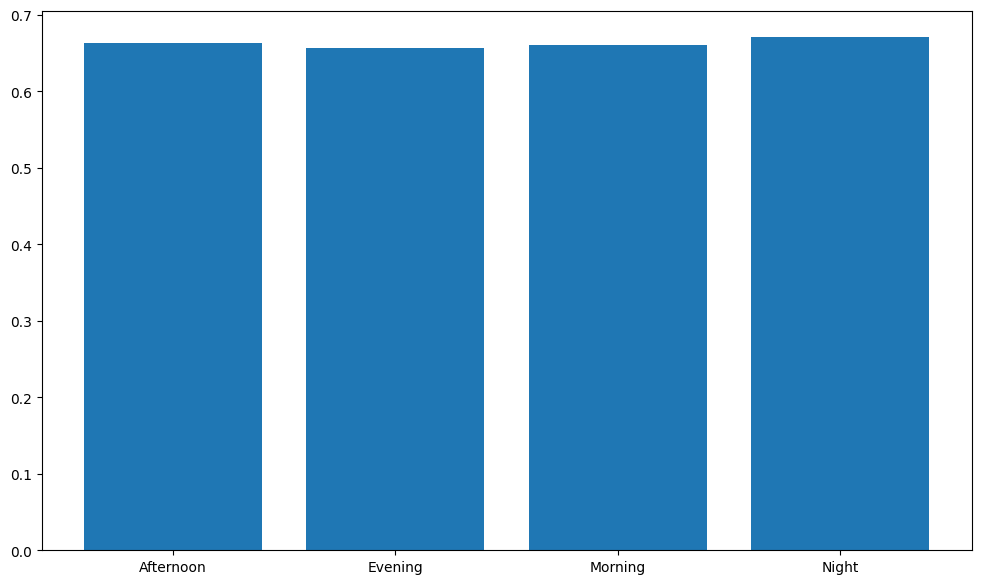

In [54]:
fig, ax = plt.subplots()

plt.bar(x = sorted(zoomed.Publication_Time.unique()), 
       height = zoomed.groupby("Publication_Time")[["Listened_percent"]].mean().unstack()
       )
plt.xticks(fontsize=10)

fig.set_size_inches(12,7)

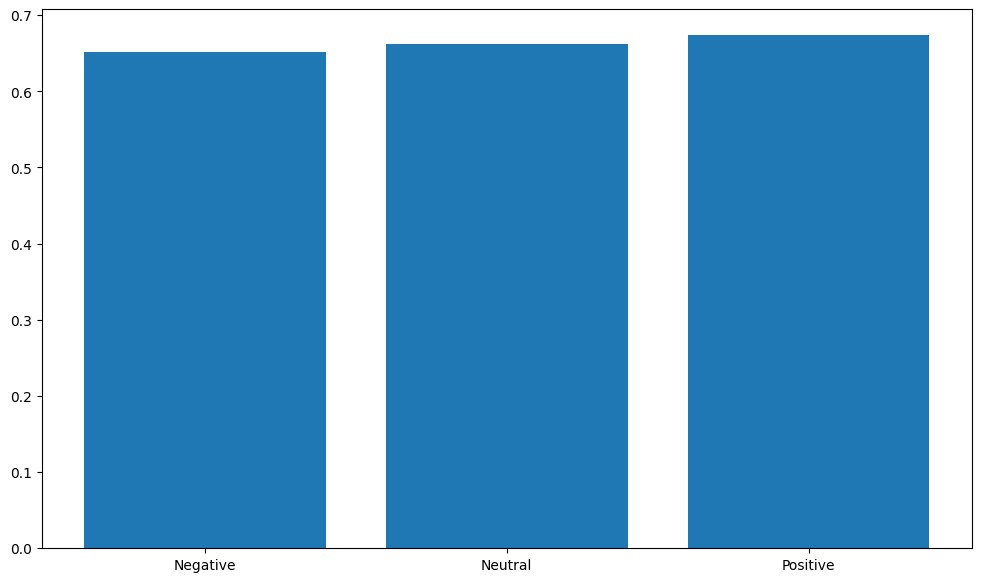

In [55]:
fig, ax = plt.subplots()

plt.bar(x = sorted(zoomed.Episode_Sentiment.unique()), 
       height = zoomed.groupby("Episode_Sentiment")[["Listened_percent"]].mean().unstack()
       )
plt.xticks(fontsize=10)

fig.set_size_inches(12,7)

In [ ]:
# TODO -
# number of ads <5 as categories in a bar chart